## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [9]:
import os
import keras
import itertools

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
#os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [3]:
train, test = keras.datasets.cifar10.load_data()

In [4]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [5]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [6]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """Code Here
    建立你的神經網路
    """
    
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    
    return model

In [7]:
"""Code Here
設定超參數
"""
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = [0.7, 0.9, 0.95, 0.99]

In [10]:
results = {}

"""
使用迴圈，建立不同 Learning rate 的模型並訓練
"""
for lr, momentum in itertools.product(LEARNING_RATE, MOMENTUM):
    keras.backend.clear_session() #把舊的Graph清掉
    print("Experiment with LR =%.6f, Momentum = %.2f" % (lr, momentum))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True,momentum=momentum)
    model.compile(loss="categorical_crossentropy", metrics=["acc"], optimizer=optimizer)
        
    model.fit(x_train, y_train,
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE,
              validation_data = (x_test, y_test),
              shuffle=True)
    
    # collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s-momentum-%s" % (str(lr), str(momentum))
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}
    

Experiment with LR =0.100000, Momentum = 0.70
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 2s 41us/step - loss: 2.1171 - acc: 0.2097 - val_loss: 1.9439 - val_acc: 0.2668
Epoch 2/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.8901 - acc: 0.3017 - val_loss: 1.8637 - val_acc: 0.3229
Epoch 3/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.7894 - acc: 0.3499 - val_loss: 1.7294 - val_acc: 0.3675
Epoch 4/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.7142 - acc: 0.3839 - val_loss: 1.7077 - val_acc: 0.3719
Epoch 5/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.6727 - acc: 0.3974 - val_loss: 1.6694 - val_acc: 0.4032
Epoch 6/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.6288 - acc: 0.4168 - val_loss: 1.6365 - val_acc: 0.3999
Epoch 7/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.5960 - acc: 0.4265 - val_loss: 1.6739 - val_acc

50000/50000 [==============================] - 2s 39us/step - loss: 1.8696 - acc: 0.3145 - val_loss: 1.9203 - val_acc: 0.2846
Epoch 3/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.8427 - acc: 0.3283 - val_loss: 1.8010 - val_acc: 0.3412
Epoch 4/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.7664 - acc: 0.3619 - val_loss: 1.7955 - val_acc: 0.3590
Epoch 5/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.7331 - acc: 0.3785 - val_loss: 1.7076 - val_acc: 0.3845
Epoch 6/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.6964 - acc: 0.3920 - val_loss: 1.7474 - val_acc: 0.3831
Epoch 7/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.6761 - acc: 0.4007 - val_loss: 1.7228 - val_acc: 0.3925
Epoch 8/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.6604 - acc: 0.4079 - val_loss: 1.7471 - val_acc: 0.3812
Epoch 9/50
50000/50000 [============================

50000/50000 [==============================] - 2s 38us/step - loss: 2.3062 - acc: 0.0985 - val_loss: 2.3080 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 2s 38us/step - loss: 2.3072 - acc: 0.0994 - val_loss: 2.3074 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 2s 38us/step - loss: 2.3081 - acc: 0.1011 - val_loss: 2.3096 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 2s 39us/step - loss: 2.3090 - acc: 0.0992 - val_loss: 2.3083 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 2s 38us/step - loss: 2.3064 - acc: 0.0995 - val_loss: 2.3050 - val_acc: 0.1000
Epoch 8/50
50000/50000 [==============================] - 2s 38us/step - loss: 2.3071 - acc: 0.0978 - val_loss: 2.3093 - val_acc: 0.1000
Epoch 9/50
50000/50000 [==============================] - 2s 38us/step - loss: 2.3077 - acc: 0.1008 - val_loss: 2.3055 - val_acc: 0.1000
Epoch 10/50
50000/50000 [===========================

50000/50000 [==============================] - 2s 38us/step - loss: 1.6271 - acc: 0.4247 - val_loss: 1.6161 - val_acc: 0.4309
Epoch 5/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.5791 - acc: 0.4428 - val_loss: 1.5776 - val_acc: 0.4366
Epoch 6/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.5416 - acc: 0.4567 - val_loss: 1.5472 - val_acc: 0.4422
Epoch 7/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.5030 - acc: 0.4710 - val_loss: 1.5423 - val_acc: 0.4457
Epoch 8/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.4762 - acc: 0.4795 - val_loss: 1.5799 - val_acc: 0.4338
Epoch 9/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.4491 - acc: 0.4887 - val_loss: 1.4776 - val_acc: 0.4704
Epoch 10/50
50000/50000 [==============================] - 2s 37us/step - loss: 1.4265 - acc: 0.4985 - val_loss: 1.5068 - val_acc: 0.4623
Epoch 11/50
50000/50000 [==========================

50000/50000 [==============================] - 2s 39us/step - loss: 1.4499 - acc: 0.4870 - val_loss: 1.4528 - val_acc: 0.4870
Epoch 6/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.4098 - acc: 0.4997 - val_loss: 1.4670 - val_acc: 0.4703
Epoch 7/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.3754 - acc: 0.5124 - val_loss: 1.4229 - val_acc: 0.4931
Epoch 8/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.3350 - acc: 0.5272 - val_loss: 1.4568 - val_acc: 0.4886
Epoch 9/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.3052 - acc: 0.5376 - val_loss: 1.4873 - val_acc: 0.4710
Epoch 10/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.2794 - acc: 0.5465 - val_loss: 1.3651 - val_acc: 0.5121
Epoch 11/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.2466 - acc: 0.5590 - val_loss: 1.3964 - val_acc: 0.5038
Epoch 12/50
50000/50000 [=========================

50000/50000 [==============================] - 2s 39us/step - loss: 1.3579 - acc: 0.5166 - val_loss: 1.5094 - val_acc: 0.4628
Epoch 7/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.3261 - acc: 0.5270 - val_loss: 1.4348 - val_acc: 0.4858
Epoch 8/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.2895 - acc: 0.5425 - val_loss: 1.5031 - val_acc: 0.4811
Epoch 9/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.2561 - acc: 0.5529 - val_loss: 1.3675 - val_acc: 0.5116
Epoch 10/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.2342 - acc: 0.5605 - val_loss: 1.3776 - val_acc: 0.5080
Epoch 11/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.2028 - acc: 0.5711 - val_loss: 1.4022 - val_acc: 0.5056
Epoch 12/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.1814 - acc: 0.5783 - val_loss: 1.3695 - val_acc: 0.5179
Epoch 13/50
50000/50000 [========================

50000/50000 [==============================] - 2s 39us/step - loss: 1.3543 - acc: 0.5148 - val_loss: 1.4502 - val_acc: 0.4794
Epoch 8/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.3216 - acc: 0.5259 - val_loss: 1.4531 - val_acc: 0.4849
Epoch 9/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.3053 - acc: 0.5338 - val_loss: 1.4599 - val_acc: 0.4790
Epoch 10/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.2824 - acc: 0.5414 - val_loss: 1.4720 - val_acc: 0.4885
Epoch 11/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.2605 - acc: 0.5527 - val_loss: 1.4254 - val_acc: 0.5003
Epoch 12/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.2374 - acc: 0.5554 - val_loss: 1.4349 - val_acc: 0.5029
Epoch 13/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.2181 - acc: 0.5633 - val_loss: 1.4175 - val_acc: 0.5008
Epoch 14/50
50000/50000 [=======================

50000/50000 [==============================] - 2s 39us/step - loss: 1.7808 - acc: 0.3783 - val_loss: 1.7767 - val_acc: 0.3801
Epoch 9/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.7636 - acc: 0.3841 - val_loss: 1.7646 - val_acc: 0.3822
Epoch 10/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.7479 - acc: 0.3893 - val_loss: 1.7457 - val_acc: 0.3851
Epoch 11/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.7334 - acc: 0.3946 - val_loss: 1.7327 - val_acc: 0.3910
Epoch 12/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.7204 - acc: 0.3992 - val_loss: 1.7166 - val_acc: 0.4024
Epoch 13/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.7074 - acc: 0.4052 - val_loss: 1.7063 - val_acc: 0.4020
Epoch 14/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.6955 - acc: 0.4087 - val_loss: 1.6923 - val_acc: 0.4114
Epoch 15/50
50000/50000 [======================

50000/50000 [==============================] - 2s 38us/step - loss: 1.6051 - acc: 0.4385 - val_loss: 1.6118 - val_acc: 0.4342
Epoch 10/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.5843 - acc: 0.4463 - val_loss: 1.5898 - val_acc: 0.4446
Epoch 11/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.5637 - acc: 0.4536 - val_loss: 1.5864 - val_acc: 0.4391
Epoch 12/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.5462 - acc: 0.4608 - val_loss: 1.5530 - val_acc: 0.4531
Epoch 13/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.5289 - acc: 0.4646 - val_loss: 1.5611 - val_acc: 0.4479
Epoch 14/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.5117 - acc: 0.4709 - val_loss: 1.5310 - val_acc: 0.4599
Epoch 15/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.4958 - acc: 0.4773 - val_loss: 1.5150 - val_acc: 0.4667
Epoch 16/50
50000/50000 [=====================

50000/50000 [==============================] - 2s 38us/step - loss: 1.4692 - acc: 0.4833 - val_loss: 1.4937 - val_acc: 0.4729
Epoch 11/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.4451 - acc: 0.4929 - val_loss: 1.4980 - val_acc: 0.4664
Epoch 12/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.4255 - acc: 0.4996 - val_loss: 1.4939 - val_acc: 0.4683
Epoch 13/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.4032 - acc: 0.5059 - val_loss: 1.4574 - val_acc: 0.4823
Epoch 14/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.3850 - acc: 0.5126 - val_loss: 1.4509 - val_acc: 0.4813
Epoch 15/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.3648 - acc: 0.5209 - val_loss: 1.4430 - val_acc: 0.4902
Epoch 16/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.3447 - acc: 0.5277 - val_loss: 1.4299 - val_acc: 0.4907
Epoch 17/50
50000/50000 [=====================

50000/50000 [==============================] - 2s 38us/step - loss: 1.2598 - acc: 0.5546 - val_loss: 1.3865 - val_acc: 0.5103
Epoch 12/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.2244 - acc: 0.5679 - val_loss: 1.3784 - val_acc: 0.5126
Epoch 13/50
50000/50000 [==============================] - 2s 37us/step - loss: 1.2005 - acc: 0.5759 - val_loss: 1.3630 - val_acc: 0.5163
Epoch 14/50
50000/50000 [==============================] - 2s 37us/step - loss: 1.1813 - acc: 0.5821 - val_loss: 1.3663 - val_acc: 0.5136
Epoch 15/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.1577 - acc: 0.5889 - val_loss: 1.3489 - val_acc: 0.5270
Epoch 16/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.1398 - acc: 0.5966 - val_loss: 1.3648 - val_acc: 0.5224
Epoch 17/50
50000/50000 [==============================] - 2s 37us/step - loss: 1.1178 - acc: 0.6020 - val_loss: 1.3778 - val_acc: 0.5206
Epoch 18/50
50000/50000 [=====================

50000/50000 [==============================] - 2s 38us/step - loss: 2.1197 - acc: 0.2653 - val_loss: 2.1135 - val_acc: 0.2731
Epoch 13/50
50000/50000 [==============================] - 2s 38us/step - loss: 2.1067 - acc: 0.2721 - val_loss: 2.1006 - val_acc: 0.2777
Epoch 14/50
50000/50000 [==============================] - 2s 38us/step - loss: 2.0940 - acc: 0.2785 - val_loss: 2.0883 - val_acc: 0.2831
Epoch 15/50
50000/50000 [==============================] - 2s 37us/step - loss: 2.0819 - acc: 0.2825 - val_loss: 2.0767 - val_acc: 0.2866
Epoch 16/50
50000/50000 [==============================] - 2s 38us/step - loss: 2.0706 - acc: 0.2877 - val_loss: 2.0655 - val_acc: 0.2918
Epoch 17/50
50000/50000 [==============================] - 2s 38us/step - loss: 2.0597 - acc: 0.2928 - val_loss: 2.0549 - val_acc: 0.2949
Epoch 18/50
50000/50000 [==============================] - 2s 38us/step - loss: 2.0494 - acc: 0.2967 - val_loss: 2.0447 - val_acc: 0.2984
Epoch 19/50
50000/50000 [=====================

50000/50000 [==============================] - 2s 38us/step - loss: 1.9064 - acc: 0.3335 - val_loss: 1.9028 - val_acc: 0.3356
Epoch 14/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.8933 - acc: 0.3377 - val_loss: 1.8902 - val_acc: 0.3432
Epoch 15/50
50000/50000 [==============================] - 2s 37us/step - loss: 1.8813 - acc: 0.3430 - val_loss: 1.8800 - val_acc: 0.3452
Epoch 16/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.8704 - acc: 0.3476 - val_loss: 1.8688 - val_acc: 0.3483
Epoch 17/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.8603 - acc: 0.3500 - val_loss: 1.8598 - val_acc: 0.3516
Epoch 18/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.8506 - acc: 0.3542 - val_loss: 1.8510 - val_acc: 0.3523
Epoch 19/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.8416 - acc: 0.3573 - val_loss: 1.8418 - val_acc: 0.3571
Epoch 20/50
50000/50000 [=====================

50000/50000 [==============================] - 2s 38us/step - loss: 1.7722 - acc: 0.3796 - val_loss: 1.7706 - val_acc: 0.3814
Epoch 15/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.7620 - acc: 0.3834 - val_loss: 1.7624 - val_acc: 0.3826
Epoch 16/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.7523 - acc: 0.3873 - val_loss: 1.7510 - val_acc: 0.3851
Epoch 17/50
50000/50000 [==============================] - 2s 37us/step - loss: 1.7433 - acc: 0.3901 - val_loss: 1.7438 - val_acc: 0.3884
Epoch 18/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.7345 - acc: 0.3943 - val_loss: 1.7332 - val_acc: 0.3940
Epoch 19/50
50000/50000 [==============================] - 2s 37us/step - loss: 1.7261 - acc: 0.3969 - val_loss: 1.7257 - val_acc: 0.3978
Epoch 20/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.7180 - acc: 0.3999 - val_loss: 1.7176 - val_acc: 0.4020
Epoch 21/50
50000/50000 [=====================

50000/50000 [==============================] - 2s 38us/step - loss: 1.5315 - acc: 0.4638 - val_loss: 1.5413 - val_acc: 0.4573
Epoch 16/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.5142 - acc: 0.4713 - val_loss: 1.5311 - val_acc: 0.4623
Epoch 17/50
50000/50000 [==============================] - 2s 37us/step - loss: 1.5019 - acc: 0.4740 - val_loss: 1.5209 - val_acc: 0.4628
Epoch 18/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.4873 - acc: 0.4802 - val_loss: 1.5113 - val_acc: 0.4679
Epoch 19/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.4713 - acc: 0.4863 - val_loss: 1.4950 - val_acc: 0.4747
Epoch 20/50
50000/50000 [==============================] - 2s 37us/step - loss: 1.4558 - acc: 0.4916 - val_loss: 1.4876 - val_acc: 0.4697
Epoch 21/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.4452 - acc: 0.4928 - val_loss: 1.4743 - val_acc: 0.4787
Epoch 22/50
50000/50000 [=====================

50000/50000 [==============================] - 2s 38us/step - loss: 2.2667 - acc: 0.1628 - val_loss: 2.2654 - val_acc: 0.1622
Epoch 17/50
50000/50000 [==============================] - 2s 38us/step - loss: 2.2640 - acc: 0.1642 - val_loss: 2.2627 - val_acc: 0.1639
Epoch 18/50
50000/50000 [==============================] - 2s 38us/step - loss: 2.2613 - acc: 0.1654 - val_loss: 2.2600 - val_acc: 0.1660
Epoch 19/50
50000/50000 [==============================] - 2s 38us/step - loss: 2.2588 - acc: 0.1672 - val_loss: 2.2575 - val_acc: 0.1672
Epoch 20/50
50000/50000 [==============================] - 2s 38us/step - loss: 2.2563 - acc: 0.1688 - val_loss: 2.2550 - val_acc: 0.1679
Epoch 21/50
50000/50000 [==============================] - 2s 37us/step - loss: 2.2538 - acc: 0.1695 - val_loss: 2.2526 - val_acc: 0.1693
Epoch 22/50
50000/50000 [==============================] - 2s 38us/step - loss: 2.2514 - acc: 0.1710 - val_loss: 2.2502 - val_acc: 0.1706
Epoch 23/50
50000/50000 [=====================

50000/50000 [==============================] - 2s 38us/step - loss: 2.1629 - acc: 0.2356 - val_loss: 2.1588 - val_acc: 0.2382
Epoch 18/50
50000/50000 [==============================] - 2s 38us/step - loss: 2.1562 - acc: 0.2385 - val_loss: 2.1522 - val_acc: 0.2411
Epoch 19/50
50000/50000 [==============================] - 2s 38us/step - loss: 2.1497 - acc: 0.2423 - val_loss: 2.1459 - val_acc: 0.2423
Epoch 20/50
50000/50000 [==============================] - 2s 38us/step - loss: 2.1435 - acc: 0.2447 - val_loss: 2.1398 - val_acc: 0.2461
Epoch 21/50
50000/50000 [==============================] - 2s 38us/step - loss: 2.1376 - acc: 0.2470 - val_loss: 2.1340 - val_acc: 0.2483
Epoch 22/50
50000/50000 [==============================] - 2s 38us/step - loss: 2.1318 - acc: 0.2498 - val_loss: 2.1283 - val_acc: 0.2513
Epoch 23/50
50000/50000 [==============================] - 2s 38us/step - loss: 2.1263 - acc: 0.2529 - val_loss: 2.1229 - val_acc: 0.2527
Epoch 24/50
50000/50000 [=====================

50000/50000 [==============================] - 2s 39us/step - loss: 2.0890 - acc: 0.2665 - val_loss: 2.0887 - val_acc: 0.2686
Epoch 19/50
50000/50000 [==============================] - 2s 39us/step - loss: 2.0807 - acc: 0.2705 - val_loss: 2.0805 - val_acc: 0.2691
Epoch 20/50
50000/50000 [==============================] - 2s 39us/step - loss: 2.0725 - acc: 0.2740 - val_loss: 2.0727 - val_acc: 0.2721
Epoch 21/50
50000/50000 [==============================] - 2s 39us/step - loss: 2.0646 - acc: 0.2772 - val_loss: 2.0649 - val_acc: 0.2762
Epoch 22/50
50000/50000 [==============================] - 2s 40us/step - loss: 2.0569 - acc: 0.2800 - val_loss: 2.0575 - val_acc: 0.2781
Epoch 23/50
50000/50000 [==============================] - 2s 39us/step - loss: 2.0496 - acc: 0.2824 - val_loss: 2.0505 - val_acc: 0.2806
Epoch 24/50
50000/50000 [==============================] - 2s 39us/step - loss: 2.0425 - acc: 0.2848 - val_loss: 2.0436 - val_acc: 0.2817
Epoch 25/50
50000/50000 [=====================

50000/50000 [==============================] - 2s 39us/step - loss: 1.8534 - acc: 0.3546 - val_loss: 1.8544 - val_acc: 0.3499
Epoch 20/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.8451 - acc: 0.3562 - val_loss: 1.8459 - val_acc: 0.3525
Epoch 21/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.8369 - acc: 0.3604 - val_loss: 1.8384 - val_acc: 0.3585
Epoch 22/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.8292 - acc: 0.3615 - val_loss: 1.8313 - val_acc: 0.3610
Epoch 23/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.8218 - acc: 0.3642 - val_loss: 1.8240 - val_acc: 0.3615
Epoch 24/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.8149 - acc: 0.3664 - val_loss: 1.8170 - val_acc: 0.3663
Epoch 25/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.8075 - acc: 0.3703 - val_loss: 1.8096 - val_acc: 0.3681
Epoch 26/50
50000/50000 [=====================

color_bar  [(1.0, 0.0, 0.16, 1.0), (1.0, 0.09220985691573928, 0.0, 1.0), (1.0, 0.36777954425013254, 0.0, 1.0), (1.0, 0.6433492315845257, 0.0, 1.0), (1.0, 0.918918918918919, 0.0, 1.0), (0.8055113937466878, 1.0, 0.0, 1.0), (0.5511393746687864, 1.0, 0.0, 1.0), (0.27556968733439324, 1.0, 0.0, 1.0), (0.0, 1.0, 0.0, 1.0), (0.0, 1.0, 0.27408812987560627, 1.0), (0.0, 1.0, 0.5481762597512125, 1.0), (0.0, 1.0, 0.8011806873286953, 1.0), (0.0, 0.9239130434782604, 1.0, 1.0), (0.0, 0.6468456947996586, 1.0, 1.0), (0.0, 0.36977834612105687, 1.0, 1.0), (0.0, 0.09271099744245515, 1.0, 1.0), (0.16304347826086973, 0.0, 1.0, 1.0), (0.4401108269394717, 0.0, 1.0, 1.0), (0.7171781756180736, 0.0, 1.0, 1.0), (0.9942455242966756, 0.0, 1.0, 1.0)]


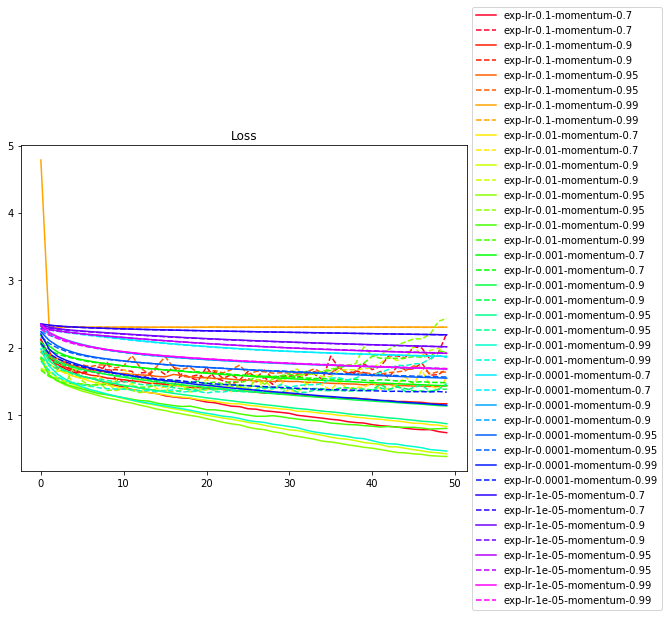

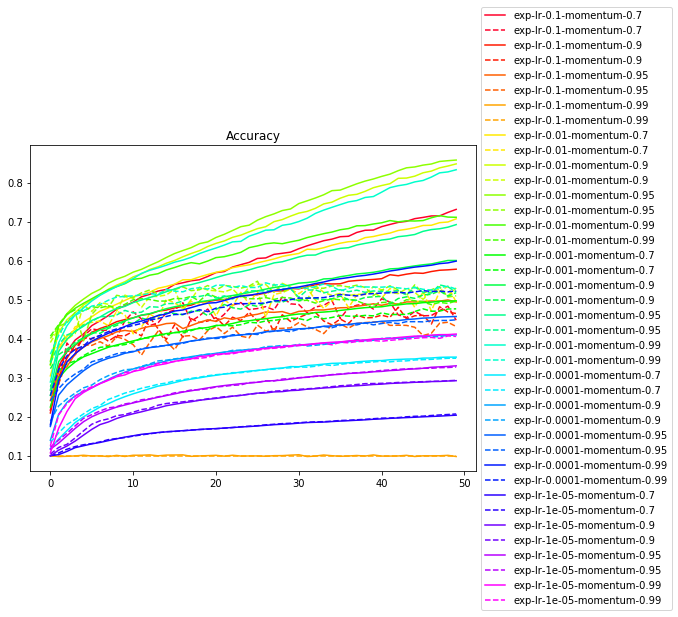

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""

NUM_COLORS = len(results.keys())
cm = plt.get_cmap('gist_rainbow')
color_bar = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]
print("color_bar ", color_bar)

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()